In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('final_daft_listings.csv')

In [3]:
df

,Address,Room,Bath,Property_type,Bedrooms_available,Available_from,Available_for,Sharing_with,Owner_occupied,Preferences,Date_entered/renewed,Property_views,Latitude,Longitude,Pre_processed_desc,Desc_length,Price_per_month,County,adjective_counts
0,"Ballycasey Close, Shannon, Co. Clare",Single Room,Shared Bathroom,House,1,Immediately,6 Months,2,Yes,Male / Female,21/03/2023,899,NaN,NaN,hoste power agency provide affordable accommod...,551,640.0,Clare,8
1,"63 Fernleigh Drive , Carpenterstown, Dublin 15",Double Room,Shared Bathroom,House,1,Immediately,1 Year,2,No,Female,10/04/2023,"1,308",NaN,NaN,two double room available carpenterstown local...,784,800.0,Dublin 15,10
2,"Beaufield Gardens, Maynooth, Co. Kildare",Double Room,Shared Bathroom,House,1,Immediately,1 Year +,4,No,Male / Female,13/04/2023,280,53.373441,-6.598454,just available room center maynooth centrally ...,364,520.0,Kildare,5
3,"87 Old Willow Park, Athlone, Athlone, Co. West...",Single Room,Shared Bathroom,House,3,"May 1st, 2023",3 Months,2,No,Female,13/04/2023,168,NaN,NaN,this fabulous newly refurbished property old w...,405,400.0,Westmeath,5
4,"62 Lanesborough Mews, Dublin 11, Dublin 11",Double Room,Shared Bathroom,Apartment,1,Immediately,6 Months,2,No,Male / Female,12/04/2023,"1,110",53.402606,-6.294961,this spaciouse double room 3 bed room apartmen...,438,950.0,Dublin 11,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,"Drumcow South, Arva, Co. Cavan",Double Room,Shared Bathroom,House,1,Immediately,6 Months,2,Yes,Male / Female,21/03/2023,178,NaN,NaN,hoste power agency provide affordable accommod...,550,560.0,Cavan,8
1725,"Corkerstown, Shantonagh, Co. Monaghan",Double Room,En-suite,House,1,Immediately,6 Months,2,Yes,Male / Female,21/03/2023,0,NaN,NaN,hoste power agency provide affordable accommod...,550,560.0,Monaghan,8
1726,"Griffin Rath Hall, Maynooth, Co. Kildare",Double Room,Shared Bathroom,Apartment,1,"Apr 21st, 2023",1 Year,2,No,Female,12/04/2023,"2,437",53.368671,-6.581904,1 double bedroom available 3 bed town house mo...,576,690.0,Kildare,16
1727,"aston village, Drogheda, Co. Louth",Single & Double Room,Shared Bathroom,House,2,Immediately,1 Year +,2,No,Male / Female / +1 Person,10/04/2023,"1,738",53.731247,-6.329441,two bedroom available rent 4 bed 3 toilet spac...,812,500.0,Louth,4


In [4]:
print(df.isnull().sum())

Address                    0
Room                       0
Bath                       0
Property_type              0
Bedrooms_available         0
Available_from             0
Available_for              0
Sharing_with               0
Owner_occupied             0
Preferences                0
Date_entered/renewed       0
Property_views             0
Latitude                1033
Longitude               1033
Pre_processed_desc         0
Desc_length                0
Price_per_month          211
County                   152
adjective_counts           0
dtype: int64


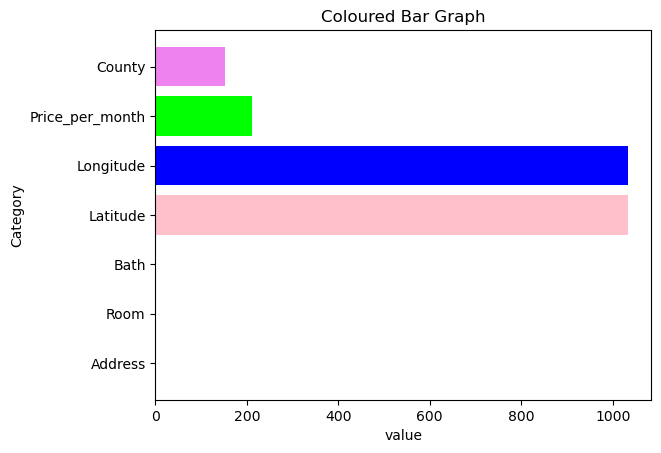

In [5]:
#create data
column = np.array(['Address','Room','Bath','Latitude','Longitude','Price_per_month','County'])
value = np.array([0,0,0,1033,1033,211,152])

#define colours for each bar
colors = np.array(['yellow','orange','maroon','pink','blue','lime','violet'])

#create horizontal bar plot
fig, ax = plt.subplots()
ax.barh(column, value, color=colors)

#set plot parameters
ax.set_xlabel('value')
ax.set_ylabel('Category')
ax.set_title('Coloured Bar Graph')
plt.show()

(14.0, 0.0)

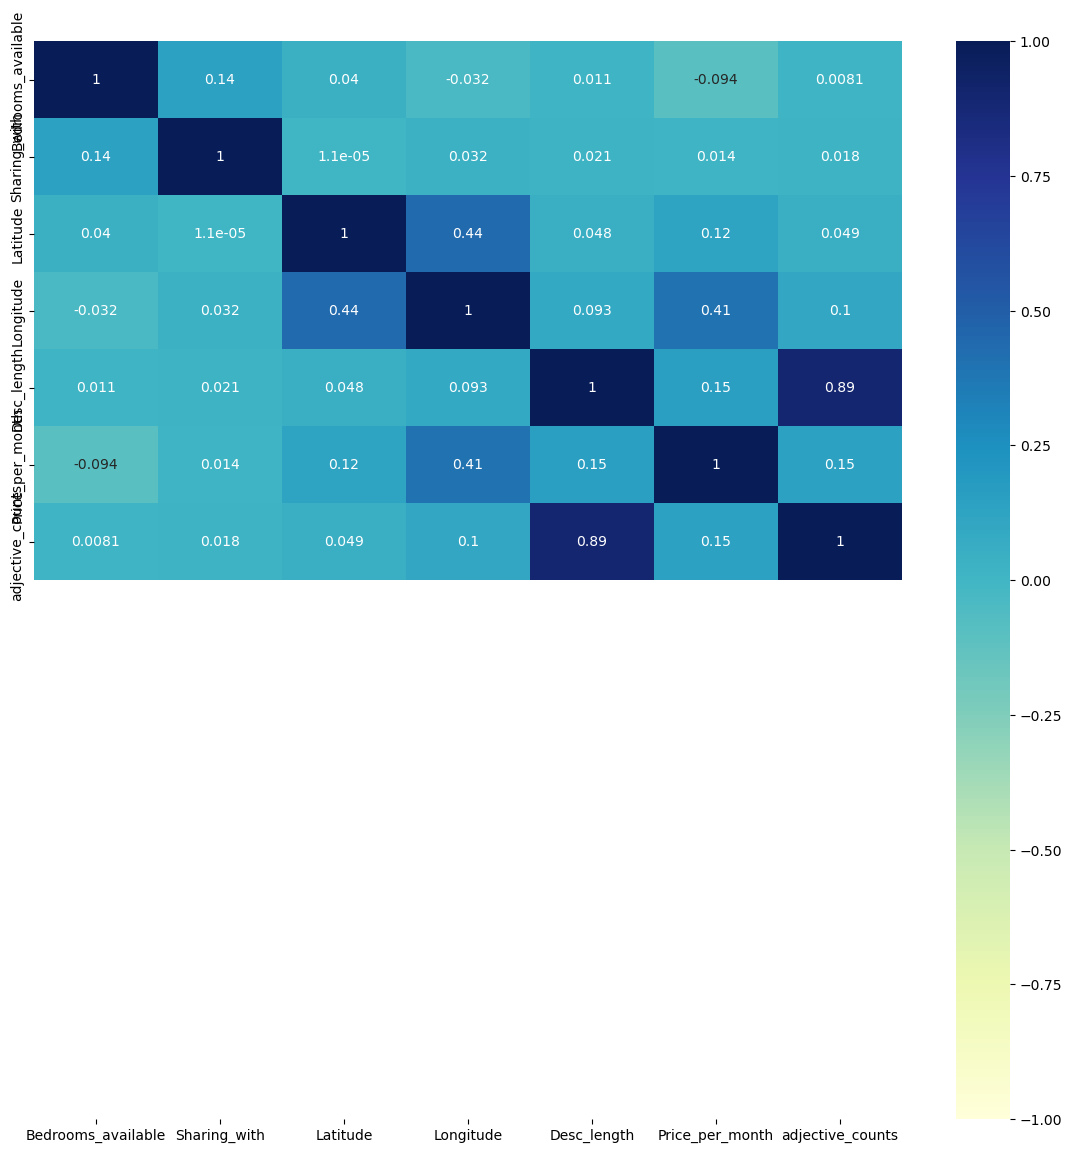

In [6]:
plt.figure(figsize=(14,14))
ax=sns.heatmap(df.corr(), cmap='YlGnBu',annot=True, vmin=-1, vmax=1)
ax.set_ylim(14,0)

In [9]:
# we can remove the collums with missing data

In [10]:
df.dropna(subset=['Price_per_month'], inplace=True)

In [11]:
missing_values = df[df['Price_per_month'].isnull()].index.tolist()

In [12]:
df["Price_per_month"].value_counts()

600.0     176
800.0      96
500.0      78
700.0      72
650.0      69
         ... 
823.0       1
433.0       1
435.0       1
1360.0      1
611.0       1
Name: Price_per_month, Length: 140, dtype: int64

In [13]:
print(df.isnull().sum())

Address                   0
Room                      0
Bath                      0
Property_type             0
Bedrooms_available        0
Available_from            0
Available_for             0
Sharing_with              0
Owner_occupied            0
Preferences               0
Date_entered/renewed      0
Property_views            0
Latitude                899
Longitude               899
Pre_processed_desc        0
Desc_length               0
Price_per_month           0
County                  123
adjective_counts          0
dtype: int64


# Question: Most expensive rent 

In [14]:
most_expensive_rent = df['Price_per_month'].max()

In [15]:
print("The most expensive rent is:", most_expensive_rent)

The most expensive rent is: 2880.0


In [16]:
max_rent_index = df['Price_per_month'].idxmax()

# Question 2: Corresponding address to the max rent

In [18]:
max_index = df['Price_per_month'].idxmax()
most_expensive_address = df.loc[max_index, 'Address']

In [19]:
print("The corresponding address is:", most_expensive_address)

The corresponding address is: OFF TANEY ROAD, Dundrum, Dublin 14
